# C964 - Randeep Jalli
## Vehicle Price prediction



In [1]:
import pandas as pandas_instance
import seaborn as seaborn_instance
import matplotlib.pyplot as pyplot_instance
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
import ipysheet
import ipywidgets



_________________

## Data Ingest


To begin with we ingest our data from the comma-separated value file included with this project.
A few rows and columns are included below for reference.

_________________

In [2]:
dataFrame= pandas_instance.read_csv('data/car data.csv')
dataFrame.head()


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


_________________


Let's see what the shape of the dataset is.


In [3]:
dataFrame.shape

(301, 9)


_________________


In order to clean the dataset, we replace values with equivalents that are already reflected elsewhere in the data.



_________________


In [4]:
dataFrame['Seller_Type'].replace(['Ebay Motors Merchant'], 'Dealer')
dataFrame['Transmission'].replace(['6-Speed'], 'Manual')

0      Manual
1      Manual
2      Manual
3      Manual
4      Manual
        ...  
296    Manual
297    Manual
298    Manual
299    Manual
300    Manual
Name: Transmission, Length: 301, dtype: object


_________________

Below we can see all the different unique feature types available in the dataset.



_________________



In [5]:
for feature in ['Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']:
    print("__________________________________________________________________________________________________")
    print("Feature Type: " + feature)
    print("Unique Values: " + str(dataFrame[feature].unique()))
    print("__________________________________________________________________________________________________")



__________________________________________________________________________________________________
Feature Type: Fuel_Type
Unique Values: ['Petrol' 'Diesel' 'CNG']
__________________________________________________________________________________________________
__________________________________________________________________________________________________
Feature Type: Seller_Type
Unique Values: ['Dealer' 'Individual']
__________________________________________________________________________________________________
__________________________________________________________________________________________________
Feature Type: Transmission
Unique Values: ['Manual' 'Automatic']
__________________________________________________________________________________________________
__________________________________________________________________________________________________
Feature Type: Owner
Unique Values: [0 1 3]
_____________________________________________________________________



_________________

Check for a Dataset clear of null or "Invalid/NotANumber" data.






In [6]:
dataFrame.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64


_________________

The Dataframe we created is shown below:

In [7]:
dataFrame.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [8]:
dataFrame.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')


_________________

## Data Cleaning
In order to predict the final price we need to select only the columns we want to be in our new DataFrame.



In [9]:

cleaned_dataset=dataFrame[['Year','Selling_Price','Present_Price','Kms_Driven','Fuel_Type','Seller_Type','Transmission','Owner']]




_________________


## Data Wrangling

In order to reflect the age of the car, we need to create a custom column and subtract from the current year.

In [10]:

cleaned_dataset['Current_Year']=2020
cleaned_dataset['age']=cleaned_dataset['Current_Year']-cleaned_dataset['Year']



A sample of the rows from our cleaned DataSet that now includes the age column.

In [11]:
cleaned_dataset.head()




,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year,age
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020,6
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020,7
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020,3
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020,9
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020,6


We need to remove the current year from our DataSet.

In [12]:
cleaned_dataset.drop(['Year','Current_Year'],axis=1, inplace=True)

In [13]:
cleaned_dataset.head()



,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,age
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,6



_________________

## Data Encoding

In order to allow the model to predict the value of the categorical features, we perform a "hot encoding" and change the categorical values to numbers.



In [14]:
cleaned_dataset= pandas_instance.get_dummies(cleaned_dataset,drop_first=True)

_________________

A sample of the rows from our encoded DataFrame.

In [15]:
cleaned_dataset.head()



,Selling_Price,Present_Price,Kms_Driven,Owner,age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1



_________________




## Sampled Columns
A sample of the columns from our encoded DataFrame.


In [17]:
cleaned_dataset.corr()


,Selling_Price,Present_Price,Kms_Driven,Owner,age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
age,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


_________________




## Pair Plot


Below we see a Pair Plot, showing various correlative measures of our data.


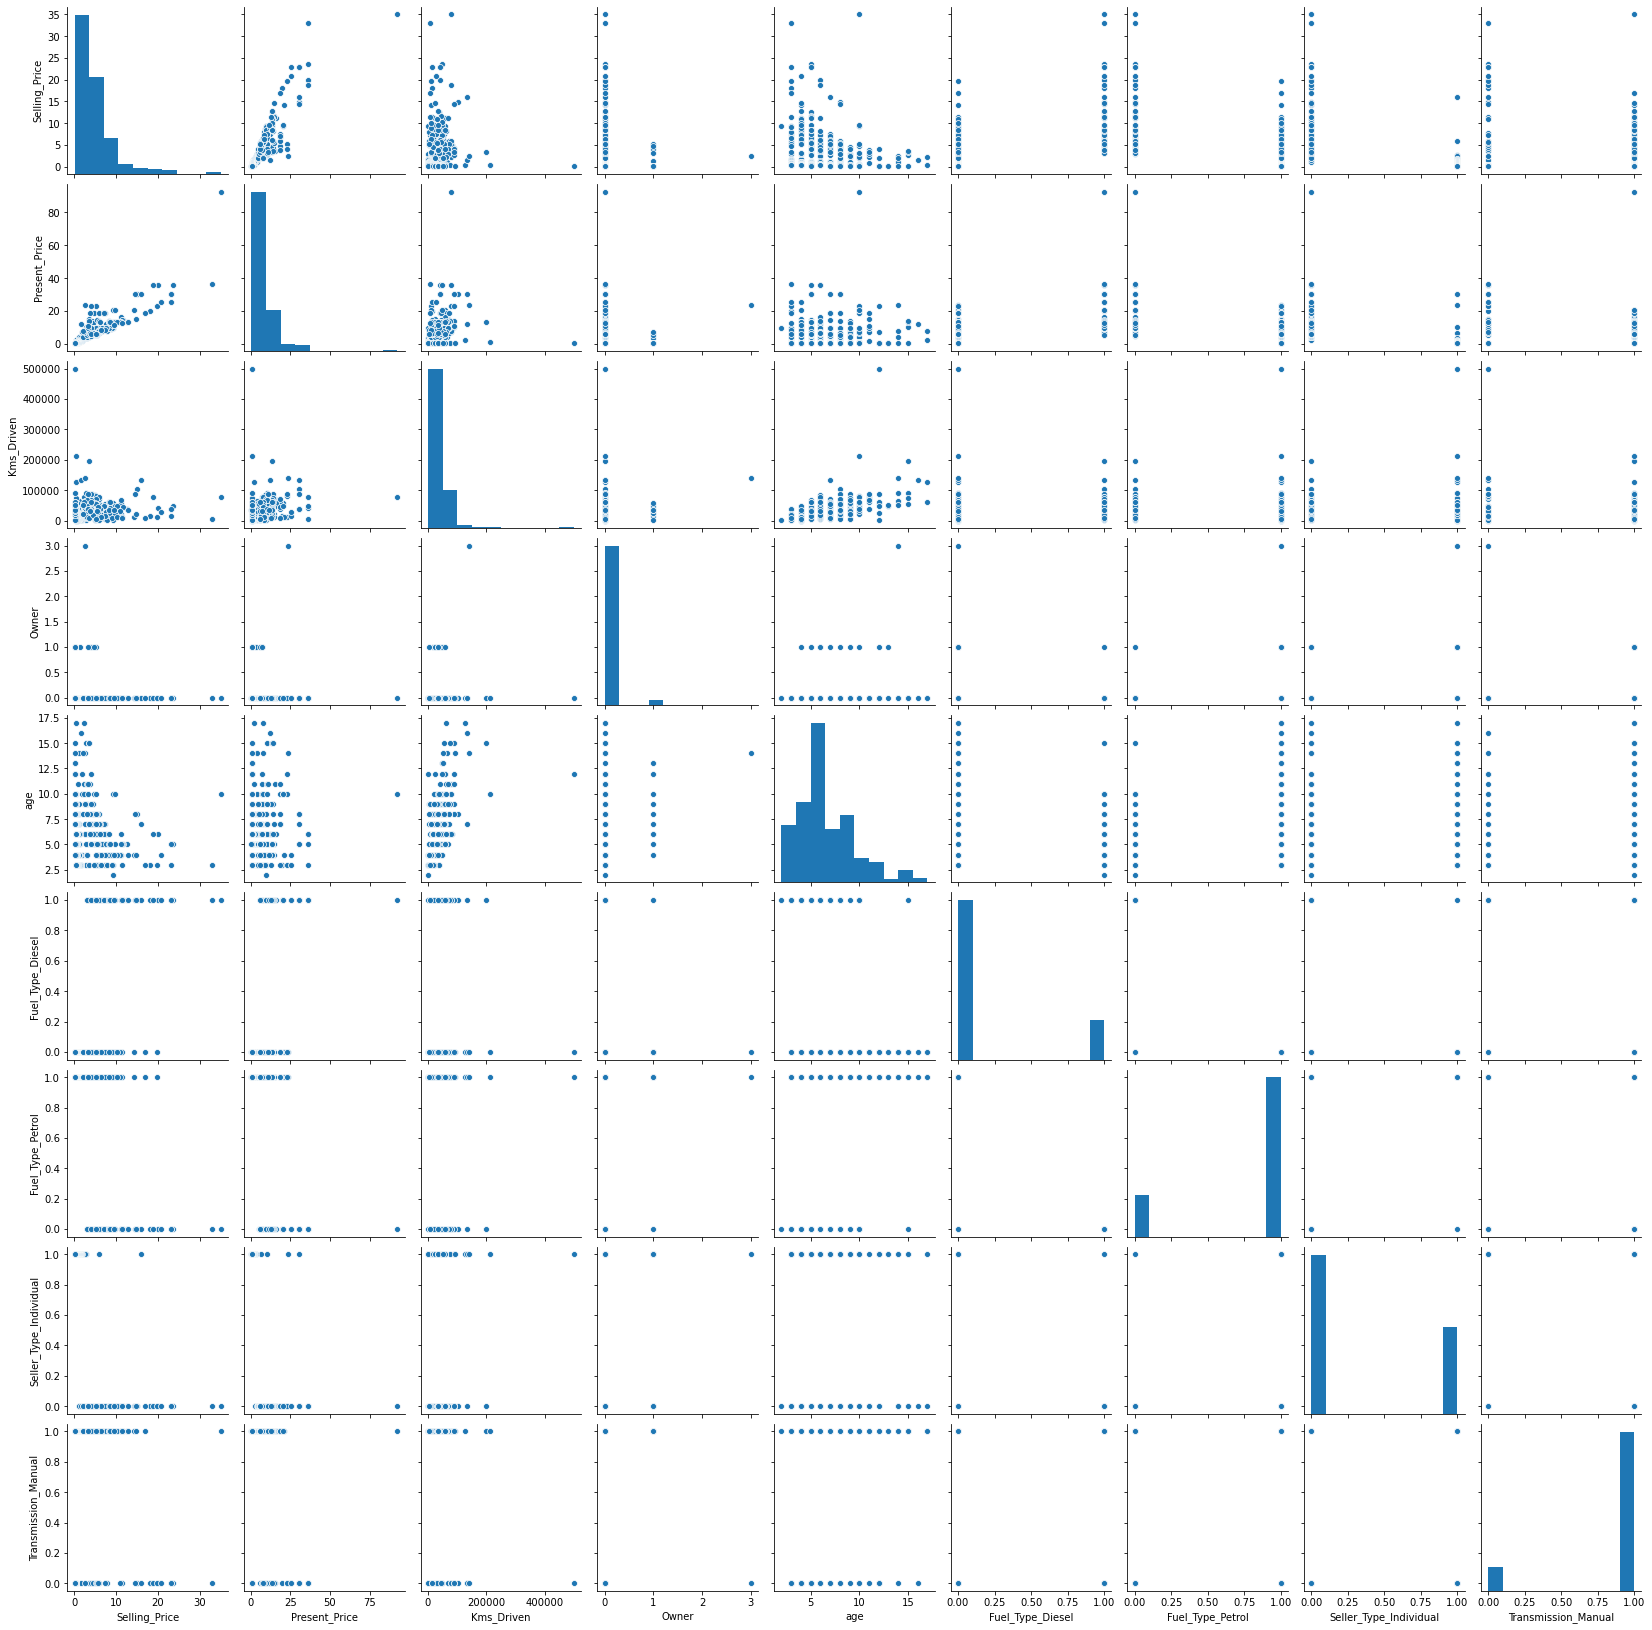

In [18]:
pair_plot = seaborn_instance.pairplot(cleaned_dataset).fig.suptitle('Pair Plot of Columns and Correlations', fontsize=50, weight='bold', y=1.1)
#air_plot.fig.subplots_adjust(top=0.9)
#pair_plot.fig.suptitle('Title', fontsize=16)



_________________


## Heatmap

In this Heatmap the Yellow features have little correlation to increased selling price, the Blue features have a high correlation to increased selling price.



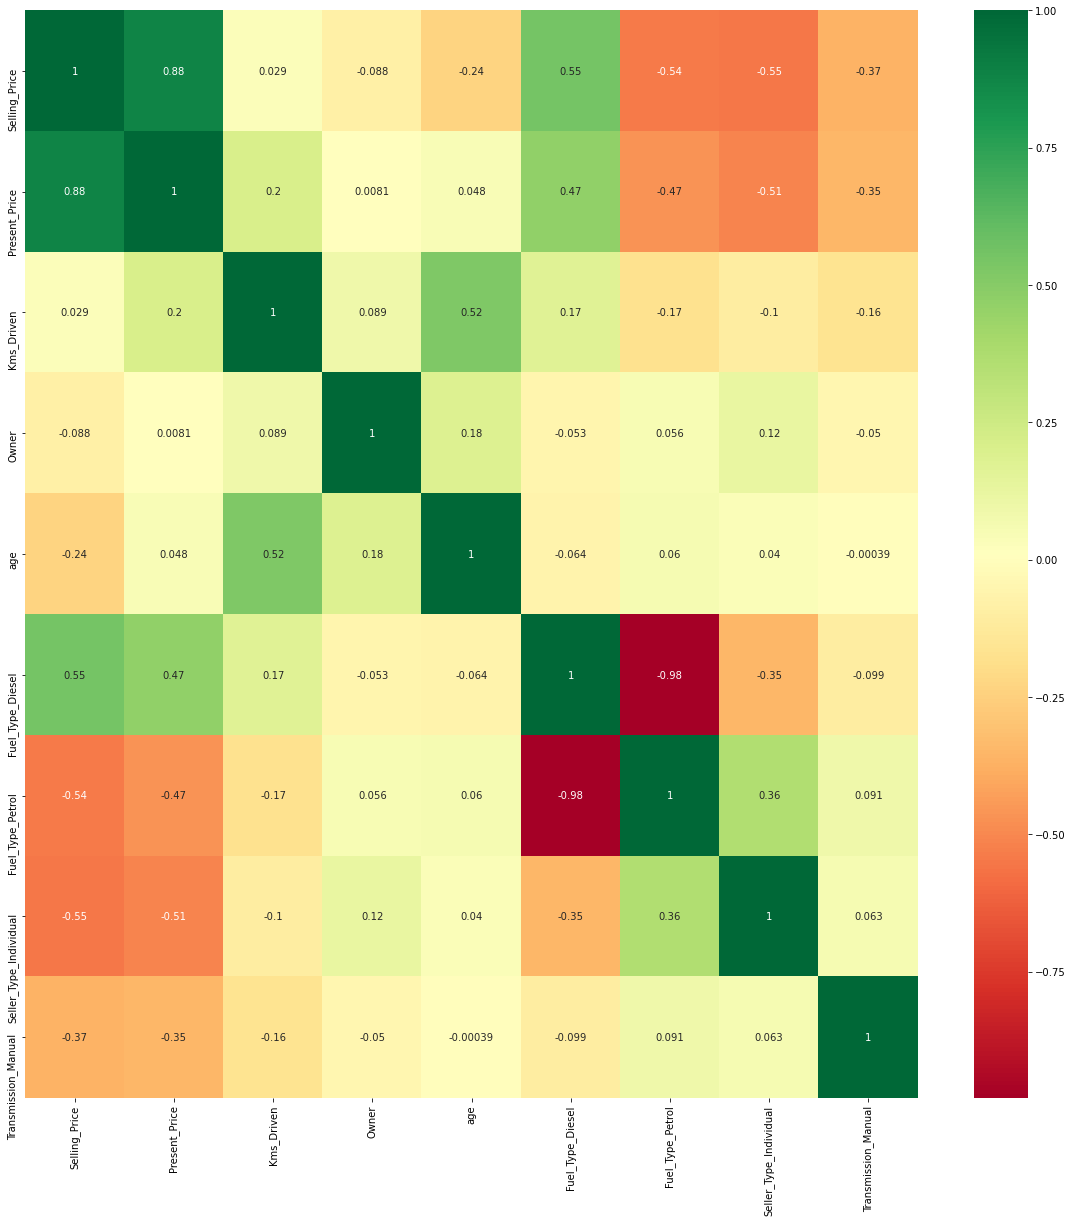

In [19]:


%matplotlib inline

correlation_matrix = cleaned_dataset.corr()
top_features = correlation_matrix.index
pyplot_instance.figure(figsize=(20,20))
heatmap=seaborn_instance.heatmap(cleaned_dataset[top_features].corr() ,annot=True, cmap="YlGnBu").set_title('Heatmap Of Features')

_________________



## Data Seperation

Below we separate our dataset into depended and independent variables.

In [20]:
# Independent and Dependent features
dependentFeature= cleaned_dataset.iloc[:,1:]
independentFeature= cleaned_dataset.iloc[:,0]



_________________

In [21]:
#dependentFeature.head()

,Present_Price,Kms_Driven,Owner,age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,6,0,1,0,1
1,9.54,43000,0,7,1,0,0,1
2,9.85,6900,0,3,0,1,0,1
3,4.15,5200,0,9,0,1,0,1
4,6.87,42450,0,6,1,0,0,1


In [22]:
#independentFeature.head()


0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64


_________________

## Feature Analysis

We create a Extra-Tree's regressor that implements a set of randomized decision tree's to show the importance of the various features.


In [23]:


model = ExtraTreesRegressor()
model.fit(dependentFeature,independentFeature)


ExtraTreesRegressor()

In [24]:
print(model.feature_importances_)




[0.33836222 0.04084882 0.0004314  0.07399331 0.24840599 0.01000086
 0.13613982 0.15181759]




_________________

## Important Features
Below we can see a graph of the various important features and a list of the top 5 most correlated features to selling price.

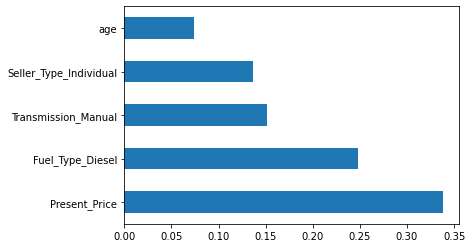

In [25]:

importantFeatures= pandas_instance.Series(model.feature_importances_, index=dependentFeature.columns)
importantFeatures.nlargest(5).plot(kind='barh')
pyplot_instance.show()

_________________



In order to gather enough data for testing the model, we split the dataset into 80% train and 20% test data.





In [26]:

X_train,X_test, y_train,y_test= train_test_split(dependentFeature,independentFeature,test_size=0.2)

In [27]:
X_train.shape




(240, 8)


_________________


Below we can see the main logic of the model, the Linear Regression function is called to create a trained model.

In [28]:

simple_regression= LinearRegression()

simple_regression.fit(X_train,y_train)


LinearRegression()


_________________




We create a prediction from the trained model using the test data we created above.

In [29]:
y_pred= simple_regression.predict(X_test)




_________________


We show an overlay distribution plot of the delta between the test dataset and the predited dataset.
This represents the error.

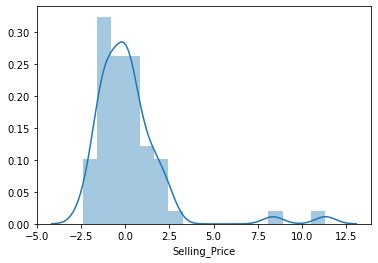

In [30]:
seaborn_instance.distplot(y_test-y_pred)



_________________



# Selling Price Prediction Calculator

Below we have our Selling Price Prediction Calculator.
This Calculator allows the user to predict the selling price of their car by tweaking the value for various features.
In order to predict the selling price for a car, please change a value in one of the fields and press enter.
The Final Price value will auto populate. Please note you MUST use the units that are noted in the feilds below. 


In [31]:
sheet = ipysheet.sheet(rows=8, columns=2, column_headers=False, row_headers=False)
present_price = ipysheet.cell(0, 1, 4.2, label_left='Present Price in Ten Thousand Dollar Increments, i.e 4.2 is $42000', type='numeric')
Kms_Driven = ipysheet.cell(1, 1, 10000, label_left='Kilometers Driven ', type='numeric')
Owner = ipysheet.cell(2, 1, 3, label_left='Number of Previous Owners in Integer, i.e 1 is 1 Previous Owner', type='numeric')
age = ipysheet.cell(3, 1, 3, label_left='Number of Years Old in Integer, i.e 1 is 1 year old', type='numeric')
fuel_type = ipysheet.cell(4, 1, 0, label_left='Fuel Type ( use 1 for Diesel 0 for Gasoline)', type='numeric')
seller_type = ipysheet.cell(5, 1, 0, label_left='Fuel Type ( use 1 for Individual 0 for Other)', type='numeric')
transmission_type = ipysheet.cell(6, 1, 1, label_left='Gearbox Type ( use 1 for Manual 0 for Automatic)', type='numeric')
price = ipysheet.cell(7, 1, 51565.26, label_left='Final Price', read_only=True)



def calculate(change):
    tempdata = {'Present_price': [present_price.value],
        'Kms_Driven': [Kms_Driven.value],
        'Owner': [Owner.value],
        'age': [age.value],
        'Seller_Type_Individual': [seller_type.value],
        'Transmission_Manual': [transmission_type.value]}
    if fuel_type.value == 1:
        tempdata['Fuel_Type_Diesel'] = [1]
        tempdata['Fuel_Type_Petrol'] = [0]
    elif fuel_type.value == 0:
        tempdata['Fuel_Type_Diesel'] = [0]
        tempdata['Fuel_Type_Petrol'] = [1]
    simple_regression.fit(X_train,y_train)
    temp_test = pandas_instance.DataFrame.from_dict(tempdata)
    temp_pred = simple_regression.predict(temp_test)
    price.value = round(temp_pred[0] * 10000, 2)

present_price.observe(calculate, 'value')
Kms_Driven.observe(calculate, 'value')
Owner.observe(calculate, 'value')
age.observe(calculate, 'value')
fuel_type.observe(calculate, 'value')
seller_type.observe(calculate, 'value')
transmission_type.observe(calculate, 'value')

ipywidgets.VBox([sheet])
